In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv')
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


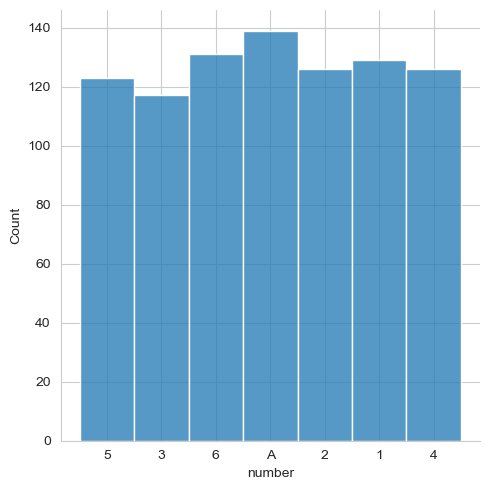

In [6]:
sns.displot(kind='hist',data=df,x=df['number'])

## extract numerical value

In [8]:
df['numerical_val'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')
df

,Cabin,Ticket,number,Survived,numerical_val
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN
...,...,...,...,...,...
886,NaN,211536,3,0,3.0
887,B42,112053,3,1,3.0
888,NaN,W./C. 6607,1,0,1.0
889,C148,111369,2,1,2.0


## extract cat value

In [10]:
df['categorical_val'] = np.where(df['numerical_val'].isnull(),df['number'],np.nan)

In [11]:
df

,Cabin,Ticket,number,Survived,numerical_val,categorical_val
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


In [12]:
df['Cabin'].nunique()

147

In [13]:
df['Ticket'].nunique()

681

## extract numerical part and categorical part of the cabin number

In [15]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['cabin_cat'] = df['Cabin'].str[0]
df

,Cabin,Ticket,number,Survived,numerical_val,categorical_val,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN
887,B42,112053,3,1,3.0,NaN,42,B
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN
889,C148,111369,2,1,2.0,NaN,148,C


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


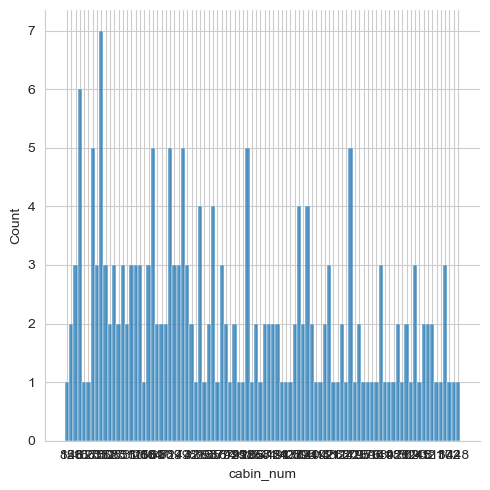

In [17]:
sns.displot(kind='hist',data=df,x='cabin_num')

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


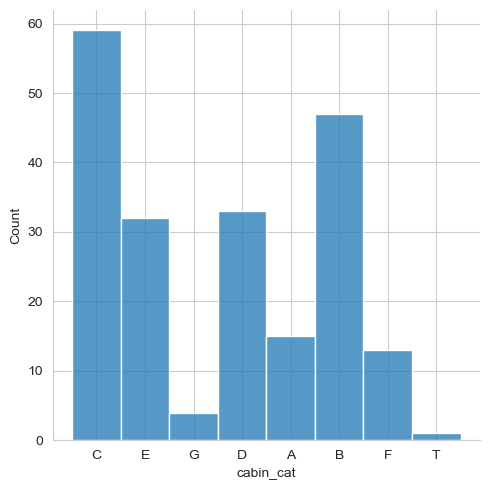

In [18]:
sns.displot(kind='hist',data=df,x='cabin_cat')

## Extract last part of ticket number

In [21]:
df['ticket_number'] = df['Ticket'].apply(lambda s:s.split()[-1])
df['ticket_number'] = pd.to_numeric(df['ticket_number'],errors='coerce',downcast='integer')
df

,Cabin,Ticket,number,Survived,numerical_val,categorical_val,cabin_num,cabin_cat,ticket_number
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0
3,C123,113803,3,1,3.0,NaN,123,C,113803.0
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0
...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0
887,B42,112053,3,1,3.0,NaN,42,B,112053.0
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0
889,C148,111369,2,1,2.0,NaN,148,C,111369.0


## Extract first part of ticket as category

In [23]:
df['ticket_cat'] = df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])
df

,Cabin,Ticket,number,Survived,numerical_val,categorical_val,cabin_num,cabin_cat,ticket_number,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.0,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN
